In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
print('end')

C:\Users\Any\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


end


In [2]:
# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
# from pyimagesearch.lenet import LeNet
from imutils import paths
# import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
# from keras.datasets import mnist
# import numpy as np

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('faces94')))
random.seed(42)
random.shuffle(imagePaths)
# print(imagePaths)

# loop over the input images
for imagePath in imagePaths:
	print(imagePath)
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	# label = 1 if label == "santa" else 0
	labels.append(label)
    
print(labels)

# scale the raw pixel intensities to the range [0, 1]
# data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float32") / 255

x_train = np.array(data, dtype="float") / 255.0
x_test = np.array(data, dtype="float") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
labels = np.array(labels)
 
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
# (x_train, x_test, y_train, y_test) = train_test_split(data,
# 	labels, test_size=0.25, random_state=42)
 
# convert the labels from integers to vectors
# y_train = to_categorical(y_train, num_classes=4)
# y_test = to_categorical(y_test, num_classes=4)

print('end')

# (x_train, _), (x_test, _) = mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

[INFO] loading images...
faces94\male\9338489\9338489.1.jpg
faces94\male\ajflem\ajflem.14.jpg
faces94\male\smrobb\smrobb.9.jpg
faces94\male\jabins\jabins.7.jpg
faces94\malestaff\tony\tony.2.jpg
faces94\malestaff\martin\martin.2.jpg
faces94\male\9416994\9416994.18.jpg
faces94\male\lejnno\lejnno.6.jpg
faces94\male\pacole\pacole.3.jpg
faces94\malestaff\anonym2\anonym2.16.jpg
faces94\male\mefait\mefait.18.jpg
faces94\male\khughe\khughe.15.jpg
faces94\female\9338535\9338535.6.jpg
faces94\male\9338489\9338489.18.jpg
faces94\male\namull\namull.19.jpg
faces94\male\nhrams\nhrams.10.jpg
faces94\male\9326871\9326871.10.jpg
faces94\female\9336923\9336923.1.jpg
faces94\male\nrclar\nrclar.7.jpg
faces94\male\jdbenm\jdbenm.18.jpg
faces94\female\slbirc\slbirc.12.jpg
faces94\male\whussa\whussa.17.jpg
faces94\malestaff\cwang\cwang.10.jpg
faces94\male\pacole\pacole.16.jpg
faces94\malestaff\doraj\doraj.6.jpg
faces94\male\ccjame\ccjame.10.jpg
faces94\female\sbains\sbains.1.jpg
faces94\male\cjcarr\cjcarr.7.j

faces94\male\mberdo\mberdo.3.jpg
faces94\malestaff\lyond\lyond.17.jpg
faces94\male\maasht\maasht.10.jpg
faces94\male\akatsi\akatsi.10.jpg
faces94\female\yfhsie\yfhsie.9.jpg
faces94\male\rgspru\rgspru.17.jpg
faces94\male\pspliu\pspliu.20.jpg
faces94\male\csanch\csanch.20.jpg
faces94\male\cgboyc\cgboyc.17.jpg
faces94\female\drbost\drbost.6.jpg
faces94\male\nrrbar\nrrbar.9.jpg
faces94\male\maasht\maasht.6.jpg
faces94\female\asamma\asamma.20.jpg
faces94\male\rmpugh\rmpugh.6.jpg
faces94\female\asewil\asewil.11.jpg
faces94\male\lejnno\lejnno.18.jpg
faces94\male\cchris\cchris.9.jpg
faces94\male\khchan\khchan.15.jpg
faces94\malestaff\macci\macci.17.jpg
faces94\malestaff\anonym1\anonym1.16.jpg
faces94\malestaff\fordj\fordj.2.jpg
faces94\female\lfso\lfso.15.jpg
faces94\male\wjalbe\wjalbe.18.jpg
faces94\malestaff\fordj\fordj.12.jpg
faces94\male\swsmit\swsmit.3.jpg
faces94\female\9336923\9336923.16.jpg
faces94\male\kdjone\kdjone.2.jpg
faces94\female\elduns\elduns.19.jpg
faces94\malestaff\martin\ma

faces94\male\9338497\9338497.3.jpg
faces94\female\lfso\lfso.6.jpg
faces94\female\yfhsie\yfhsie.17.jpg
faces94\male\cgboyc\cgboyc.15.jpg
faces94\malestaff\michael\michael.19.jpg
faces94\male\nrrbar\nrrbar.18.jpg
faces94\male\jcarte\jcarte.13.jpg
faces94\male\bplyce\bplyce.14.jpg
faces94\male\nahaig\nahaig.20.jpg
faces94\male\dakram\dakram.12.jpg
faces94\male\sjbeck\sjbeck.19.jpg
faces94\male\swsmit\swsmit.1.jpg
faces94\male\djmart\djmart.9.jpg
faces94\male\pspliu\pspliu.19.jpg
faces94\male\muthay\muthay.3.jpg
faces94\male\rnpwil\rnpwil.5.jpg
faces94\malestaff\sandm\sandm.8.jpg
faces94\male\cwchoi\cwchoi.7.jpg
faces94\female\gotone\elduns.jpg
faces94\male\jmedin\jmedin.5.jpg
faces94\male\ggrego\ggrego.16.jpg
faces94\male\admars\admars.15.jpg
faces94\male\rlocke\rlocke.2.jpg
faces94\male\ajones\ajones.12.jpg
faces94\male\rmcoll\rmcoll.10.jpg
faces94\male\jagrif\jagrif.18.jpg
faces94\female\yfhsie\yfhsie.5.jpg
faces94\male\pmives\pmives.12.jpg
faces94\male\mjhans\mjhans.15.jpg
faces94\male

faces94\malestaff\ieorf\ieorf.17.jpg
faces94\female\ekavaz\ekavaz.20.jpg
faces94\male\kdjone\kdjone.7.jpg
faces94\male\pspliu\pspliu.9.jpg
faces94\male\saedwa\saedwa.3.jpg
faces94\male\dakram\dakram.10.jpg
faces94\male\mberdo\mberdo.12.jpg
faces94\malestaff\moors\moors.9.jpg
faces94\male\rgharr\rgharr.14.jpg
faces94\male\nwilli\nwilli.4.jpg
faces94\malestaff\cwang\cwang.1.jpg
faces94\male\muthay\muthay.11.jpg
faces94\male\spletc\spletc.5.jpg
faces94\male\djmart\djmart.10.jpg
faces94\male\khchan\khchan.17.jpg
faces94\male\csanch\csanch.3.jpg
faces94\male\gdhatc\gdhatc.3.jpg
faces94\malestaff\moors\moors.5.jpg
faces94\male\smrobb\smrobb.19.jpg
faces94\male\djmart\djmart.15.jpg
faces94\malestaff\michael\michael.5.jpg
faces94\male\rgharr\rgharr.18.jpg
faces94\male\gpsmit\gpsmit.15.jpg
faces94\female\drbost\drbost.10.jpg
faces94\male\sidick\sidick.1.jpg
faces94\male\rjlabr\rjlabr.9.jpg
faces94\male\jgloma\jgloma.7.jpg
faces94\male\mhwill\mhwill.18.jpg
faces94\male\csanch\csanch.13.jpg
faces

faces94\male\mberdo\mberdo.4.jpg
faces94\malestaff\tony\tony.13.jpg
faces94\male\9338489\9338489.15.jpg
faces94\male\lejnno\lejnno.5.jpg
faces94\female\ksunth\ksunth.12.jpg
faces94\male\jlemon\jlemon.19.jpg
faces94\male\ptnich\ptnich.16.jpg
faces94\malestaff\moors\moors.12.jpg
faces94\male\khughe\khughe.9.jpg
faces94\malestaff\obeidn\obeidn.4.jpg
faces94\male\rlocke\rlocke.17.jpg
faces94\male\rgspru\rgspru.15.jpg
faces94\male\rnpwil\rnpwil.17.jpg
faces94\male\nrrbar\nrrbar.3.jpg
faces94\malestaff\tony\tony.12.jpg
faces94\male\jrtobi\jrtobi.11.jpg
faces94\male\cjsake\cjsake.19.jpg
faces94\male\csanch\csanch.15.jpg
faces94\male\ajsega\ajsega.18.jpg
faces94\malestaff\sandm\sandm.12.jpg
faces94\male\cferdo\cferdo.20.jpg
faces94\male\skumar\skumar.10.jpg
faces94\male\cjcarr\cjcarr.3.jpg
faces94\malestaff\anonym2\anonym2.4.jpg
faces94\malestaff\moors\moors.19.jpg
faces94\male\khughe\khughe.12.jpg
faces94\male\cwchoi\cwchoi.8.jpg
faces94\male\ajsega\ajsega.16.jpg
faces94\male\irdrew\irdrew.1.

faces94\male\rnpwil\rnpwil.13.jpg
faces94\male\saedwa\saedwa.2.jpg
faces94\male\dagran\dagran.7.jpg
faces94\male\irdrew\irdrew.13.jpg
faces94\male\rmcoll\rmcoll.14.jpg
faces94\male\miaduc\miaduc.19.jpg
faces94\male\rlocke\rlocke.16.jpg
faces94\female\astefa\astefa.15.jpg
faces94\malestaff\michael\michael.17.jpg
faces94\malestaff\lyond\lyond.9.jpg
faces94\male\9326871\9326871.18.jpg
faces94\female\sbains\sbains.20.jpg
faces94\male\ccjame\ccjame.8.jpg
faces94\male\dcbowe\dcbowe.10.jpg
faces94\malestaff\martin\martin.8.jpg
faces94\male\rlocke\rlocke.3.jpg
faces94\male\9338527\9338527.8.jpg
faces94\male\rjlabr\rjlabr.6.jpg
faces94\male\muthay\muthay.4.jpg
faces94\malestaff\doraj\doraj.18.jpg
faces94\male\akatsi\akatsi.4.jpg
faces94\male\jdbenm\jdbenm.16.jpg
faces94\malestaff\doraj\doraj.19.jpg
faces94\male\wjalbe\wjalbe.10.jpg
faces94\male\rgspru\rgspru.9.jpg
faces94\malestaff\hensm\hensm.5.jpg
faces94\male\9338462\9338462.1.jpg
faces94\male\jagrif\jagrif.7.jpg
faces94\male\9338543\9338543

faces94\malestaff\cwang\cwang.9.jpg
faces94\male\rmpugh\rmpugh.19.jpg
faces94\male\nahaig\nahaig.7.jpg
faces94\malestaff\spacl\spacl.5.jpg
faces94\female\9336923\9336923.5.jpg
faces94\female\astefa\astefa.20.jpg
faces94\male\ggeorg\ggeorg.17.jpg
faces94\male\bplyce\bplyce.19.jpg
faces94\male\9338446\9338446.20.jpg
faces94\female\asewil\asewil.3.jpg
faces94\male\9416994\9416994.20.jpg
faces94\male\wjalbe\wjalbe.12.jpg
faces94\male\dcbowe\dcbowe.1.jpg
faces94\male\rjlabr\rjlabr.8.jpg
faces94\male\gdhatc\gdhatc.5.jpg
faces94\malestaff\hartb\hartb.14.jpg
faces94\male\sjbeck\sjbeck.11.jpg
faces94\male\9338543\9338543.10.jpg
faces94\female\klclar\klclar.17.jpg
faces94\male\kdjone\kdjone.9.jpg
faces94\male\ajones\ajones.16.jpg
faces94\female\klclar\klclar.4.jpg
faces94\male\saedwa\saedwa.14.jpg
faces94\male\9338446\9338446.11.jpg
faces94\male\mefait\mefait.19.jpg
faces94\male\ccjame\ccjame.18.jpg
faces94\male\cjcarr\cjcarr.15.jpg
faces94\malestaff\anonym2\anonym2.20.jpg
faces94\male\rnpwil\rn

faces94\male\npmitc\npmitc.19.jpg
faces94\male\9338454\9338454.8.jpg
faces94\male\lejnno\lejnno.15.jpg
faces94\male\rnpwil\rnpwil.3.jpg
faces94\malestaff\sandm\sandm.9.jpg
faces94\malestaff\anonym1\anonym1.17.jpg
faces94\male\sidick\sidick.8.jpg
faces94\male\kaatki\kaatki.17.jpg
faces94\male\ndbank\ndbank.1.jpg
faces94\male\npbour\npbour.3.jpg
faces94\malestaff\voudcx\voudcx.16.jpg
faces94\male\djhugh\djhugh.7.jpg
faces94\male\mberdo\mberdo.19.jpg
faces94\female\ksunth\ksunth.8.jpg
faces94\male\9338462\9338462.9.jpg
faces94\male\ajflem\ajflem.13.jpg
faces94\male\khchan\khchan.20.jpg
faces94\female\astefa\astefa.12.jpg
faces94\female\anpage\anpage.12.jpg
faces94\male\sjbeck\sjbeck.16.jpg
faces94\male\sidick\sidick.16.jpg
faces94\male\gmwate\gmwate.5.jpg
faces94\male\9332898\9332898.5.jpg
faces94\male\gpsmit\gpsmit.8.jpg
faces94\malestaff\sandm\sandm.2.jpg
faces94\male\mjhans\mjhans.1.jpg
faces94\male\rmpugh\rmpugh.18.jpg
faces94\female\ksunth\ksunth.2.jpg
faces94\female\yfhsie\yfhsie.18

faces94\male\cjsake\cjsake.11.jpg
faces94\male\9338497\9338497.10.jpg
faces94\male\gmwate\gmwate.16.jpg
faces94\male\rjlabr\rjlabr.12.jpg
faces94\male\9338454\9338454.6.jpg
faces94\female\mbutle\mbutle.4.jpg
faces94\male\dmwest\dmwest.5.jpg
faces94\male\sjbeck\sjbeck.5.jpg
faces94\male\cwchoi\cwchoi.1.jpg
faces94\male\9338462\9338462.4.jpg
faces94\male\jabins\jabins.1.jpg
faces94\male\gjhero\gjhero.19.jpg
faces94\male\asheal\asheal.13.jpg
faces94\male\nrclar\nrclar.15.jpg
faces94\male\ggrego\ggrego.18.jpg
faces94\female\elduns\elduns.10.jpg
faces94\female\slbirc\slbirc.9.jpg
faces94\male\rarobi\rarobi.4.jpg
faces94\female\vstros\vstros.18.jpg
faces94\male\khughe\khughe.13.jpg
faces94\male\irdrew\irdrew.7.jpg
faces94\male\rgspru\rgspru.2.jpg
faces94\male\ccjame\ccjame.13.jpg
faces94\male\swewin\swewin.19.jpg
faces94\male\9338489\9338489.10.jpg
faces94\malestaff\robin\robin.18.jpg
faces94\male\cgboyc\cgboyc.12.jpg
faces94\male\ambarw\ambarw.17.jpg
faces94\male\sjbeck\sjbeck.14.jpg
faces9

faces94\male\nahaig\nahaig.1.jpg
faces94\male\djhugh\djhugh.9.jpg
faces94\male\dmwest\dmwest.10.jpg
faces94\male\cjsake\cjsake.18.jpg
faces94\female\drbost\drbost.3.jpg
faces94\male\dmwest\dmwest.3.jpg
faces94\male\ndhagu\ndhagu.14.jpg
faces94\male\rarobi\rarobi.16.jpg
faces94\male\lejnno\lejnno.4.jpg
faces94\female\9336923\9336923.19.jpg
faces94\male\admars\admars.11.jpg
faces94\female\phughe\phughe.17.jpg
faces94\male\ajones\ajones.20.jpg
faces94\male\csanch\csanch.12.jpg
faces94\male\admars\admars.13.jpg
faces94\female\sbains\sbains.3.jpg
faces94\malestaff\anonym1\anonym1.15.jpg
faces94\malestaff\obeidn\obeidn.16.jpg
faces94\male\ccjame\ccjame.20.jpg
faces94\male\9326871\9326871.16.jpg
faces94\female\ksunth\ksunth.16.jpg
faces94\male\swsmit\swsmit.19.jpg
faces94\male\mefait\mefait.7.jpg
faces94\male\gdhatc\gdhatc.8.jpg
faces94\male\mjhans\mjhans.4.jpg
faces94\male\muthay\muthay.15.jpg
faces94\male\saedwa\saedwa.13.jpg
faces94\male\pshurr\pshurr.10.jpg
faces94\male\cjdenn\cjdenn.14.j

faces94\male\kdjone\kdjone.6.jpg
faces94\male\mdpove\mdpove.10.jpg
faces94\male\ccjame\ccjame.17.jpg
faces94\female\ksunth\ksunth.6.jpg
faces94\male\mberdo\mberdo.13.jpg
faces94\male\ndbank\ndbank.18.jpg
faces94\male\rgharr\rgharr.12.jpg
faces94\male\gpsmit\gpsmit.6.jpg
faces94\male\lejnno\lejnno.19.jpg
faces94\male\mberdo\mberdo.1.jpg
faces94\female\lfso\lfso.13.jpg
faces94\male\cferdo\cferdo.7.jpg
faces94\male\9416994\9416994.15.jpg
faces94\male\kaatki\kaatki.18.jpg
faces94\male\cjsake\cjsake.17.jpg
faces94\male\9414649\9414649.8.jpg
faces94\malestaff\moors\moors.13.jpg
faces94\female\sbains\sbains.2.jpg
faces94\male\rarobi\rarobi.3.jpg
faces94\male\gmwate\gmwate.19.jpg
faces94\male\gsreas\gsreas.6.jpg
faces94\male\dioann\dioann.3.jpg
faces94\male\cmkirk\cmkirk.10.jpg
faces94\male\djmart\djmart.2.jpg
faces94\female\phughe\phughe.8.jpg
faces94\male\mjhans\mjhans.11.jpg
faces94\male\djbirc\djbirc.14.jpg
faces94\male\csanch\csanch.1.jpg
faces94\male\npbour\npbour.14.jpg
faces94\male\pmi

faces94\male\9338519\9338519.2.jpg
faces94\male\9332898\9332898.14.jpg
faces94\male\ggeorg\ggeorg.16.jpg
faces94\male\rjlabr\rjlabr.20.jpg
faces94\female\9338535\9338535.20.jpg
faces94\male\pspliu\pspliu.16.jpg
faces94\male\smrobb\smrobb.15.jpg
faces94\male\ggrego\ggrego.1.jpg
faces94\male\rgharr\rgharr.15.jpg
faces94\malestaff\ieorf\ieorf.8.jpg
faces94\male\admars\admars.16.jpg
faces94\male\djmart\djmart.17.jpg
faces94\male\jlemon\jlemon.4.jpg
faces94\male\cshubb\cshubb.10.jpg
faces94\female\mbutle\mbutle.11.jpg
faces94\male\jagrif\jagrif.19.jpg
faces94\male\9338519\9338519.12.jpg
faces94\malestaff\doraj\doraj.2.jpg
faces94\male\nwilli\nwilli.3.jpg
faces94\male\cferdo\cferdo.4.jpg
faces94\male\rarobi\rarobi.12.jpg
faces94\female\phughe\phughe.10.jpg
faces94\male\9326871\9326871.19.jpg
faces94\male\rmcoll\rmcoll.16.jpg
faces94\male\svkriz\svkriz.14.jpg
faces94\male\nahaig\nahaig.8.jpg
faces94\female\9338535\9338535.8.jpg
faces94\female\mbutle\mbutle.8.jpg
faces94\malestaff\anonym\anony

faces94\male\kaatki\kaatki.13.jpg
faces94\male\kaatki\kaatki.7.jpg
faces94\female\lfso\lfso.10.jpg
faces94\male\sidick\sidick.12.jpg
faces94\male\mdpove\mdpove.19.jpg
faces94\malestaff\hartb\hartb.17.jpg
faces94\male\admars\admars.6.jpg
faces94\male\swewin\swewin.2.jpg
faces94\male\9416994\9416994.16.jpg
faces94\male\9338446\9338446.19.jpg
faces94\female\gotone\lfso.jpg
faces94\female\vstros\vstros.3.jpg
faces94\male\nrclar\nrclar.11.jpg
faces94\male\ohpark\ohpark.17.jpg
faces94\male\9338527\9338527.16.jpg
faces94\male\cgboyc\cgboyc.9.jpg
faces94\male\jgloma\jgloma.12.jpg
faces94\male\khughe\khughe.6.jpg
faces94\male\rsanti\rsanti.2.jpg
faces94\male\mefait\mefait.5.jpg
faces94\male\rsanti\rsanti.5.jpg
faces94\male\dakram\dakram.7.jpg
faces94\male\rarobi\rarobi.17.jpg
faces94\male\rmcoll\rmcoll.1.jpg
faces94\male\cshubb\cshubb.2.jpg
faces94\malestaff\voudcx\voudcx.20.jpg
faces94\male\dcbowe\dcbowe.14.jpg
faces94\male\9338543\9338543.15.jpg
faces94\male\namull\namull.1.jpg
faces94\male\w

In [20]:
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

print('end')

Train on 3059 samples, validate on 3059 samples
Epoch 1/1000
3059/3059 [==============================] - 7s 2ms/step - loss: 0.6927 - val_loss: 0.6917
Epoch 2/1000
3059/3059 [==============================] - 1s 359us/step - loss: 0.6909 - val_loss: 0.6897
Epoch 3/1000
3059/3059 [==============================] - 1s 369us/step - loss: 0.6883 - val_loss: 0.6862
Epoch 4/1000
3059/3059 [==============================] - 1s 351us/step - loss: 0.6837 - val_loss: 0.6801
Epoch 5/1000
3059/3059 [==============================] - 1s 378us/step - loss: 0.6762 - val_loss: 0.6709
Epoch 6/1000
3059/3059 [==============================] - 1s 361us/step - loss: 0.6659 - val_loss: 0.6600
Epoch 7/1000
3059/3059 [==============================] - 1s 353us/step - loss: 0.6554 - val_loss: 0.6505
Epoch 8/1000
3059/3059 [==============================] - 1s 353us/step - loss: 0.6474 - val_loss: 0.6443
Epoch 9/1000
3059/3059 [==============================] - 1s 364us/step - loss: 0.6427 - val_loss: 0.6411


3059/3059 [==============================] - 1s 332us/step - loss: 0.5962 - val_loss: 0.5961
Epoch 154/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5960 - val_loss: 0.5959
Epoch 155/1000
3059/3059 [==============================] - 1s 318us/step - loss: 0.5959 - val_loss: 0.5958
Epoch 156/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5957 - val_loss: 0.5956
Epoch 157/1000
3059/3059 [==============================] - 1s 327us/step - loss: 0.5956 - val_loss: 0.5955
Epoch 158/1000
3059/3059 [==============================] - 1s 315us/step - loss: 0.5954 - val_loss: 0.5953
Epoch 159/1000
3059/3059 [==============================] - 1s 319us/step - loss: 0.5953 - val_loss: 0.5952
Epoch 160/1000
3059/3059 [==============================] - 1s 317us/step - loss: 0.5951 - val_loss: 0.5951
Epoch 161/1000
3059/3059 [==============================] - 1s 322us/step - loss: 0.5950 - val_loss: 0.5949
Epoch 162/1000
3059/3059 [=================

Epoch 229/1000
3059/3059 [==============================] - 1s 274us/step - loss: 0.5874 - val_loss: 0.5873
Epoch 230/1000
3059/3059 [==============================] - 1s 334us/step - loss: 0.5873 - val_loss: 0.5872
Epoch 231/1000
3059/3059 [==============================] - 1s 342us/step - loss: 0.5872 - val_loss: 0.5871
Epoch 232/1000
3059/3059 [==============================] - 1s 321us/step - loss: 0.5871 - val_loss: 0.5870
Epoch 233/1000
3059/3059 [==============================] - 1s 296us/step - loss: 0.5870 - val_loss: 0.5869
Epoch 234/1000
3059/3059 [==============================] - 1s 318us/step - loss: 0.5869 - val_loss: 0.5869
Epoch 235/1000
3059/3059 [==============================] - 1s 364us/step - loss: 0.5868 - val_loss: 0.5868
Epoch 236/1000
3059/3059 [==============================] - 1s 344us/step - loss: 0.5867 - val_loss: 0.5867
Epoch 237/1000
3059/3059 [==============================] - 1s 349us/step - loss: 0.5866 - val_loss: 0.5866
Epoch 238/1000
3059/3059 [==

Epoch 305/1000
3059/3059 [==============================] - 1s 375us/step - loss: 0.5819 - val_loss: 0.5818
Epoch 306/1000
3059/3059 [==============================] - 1s 382us/step - loss: 0.5818 - val_loss: 0.5818
Epoch 307/1000
3059/3059 [==============================] - 1s 333us/step - loss: 0.5818 - val_loss: 0.5817
Epoch 308/1000
3059/3059 [==============================] - 1s 349us/step - loss: 0.5817 - val_loss: 0.5817
Epoch 309/1000
3059/3059 [==============================] - 1s 357us/step - loss: 0.5817 - val_loss: 0.5816
Epoch 310/1000
3059/3059 [==============================] - 1s 419us/step - loss: 0.5816 - val_loss: 0.5816
Epoch 311/1000
3059/3059 [==============================] - 1s 344us/step - loss: 0.5816 - val_loss: 0.5815
Epoch 312/1000
3059/3059 [==============================] - 1s 388us/step - loss: 0.5815 - val_loss: 0.5815
Epoch 313/1000
3059/3059 [==============================] - 1s 385us/step - loss: 0.5814 - val_loss: 0.5814
Epoch 314/1000
3059/3059 [==

Epoch 381/1000
3059/3059 [==============================] - 1s 281us/step - loss: 0.5785 - val_loss: 0.5784
Epoch 382/1000
3059/3059 [==============================] - 1s 259us/step - loss: 0.5784 - val_loss: 0.5784
Epoch 383/1000
3059/3059 [==============================] - 1s 260us/step - loss: 0.5784 - val_loss: 0.5784
Epoch 384/1000
3059/3059 [==============================] - 1s 259us/step - loss: 0.5784 - val_loss: 0.5783
Epoch 385/1000
3059/3059 [==============================] - 1s 325us/step - loss: 0.5783 - val_loss: 0.5783
Epoch 386/1000
3059/3059 [==============================] - 1s 269us/step - loss: 0.5783 - val_loss: 0.5782
Epoch 387/1000
3059/3059 [==============================] - 1s 269us/step - loss: 0.5782 - val_loss: 0.5782
Epoch 388/1000
3059/3059 [==============================] - 1s 287us/step - loss: 0.5782 - val_loss: 0.5782
Epoch 389/1000
3059/3059 [==============================] - 1s 257us/step - loss: 0.5782 - val_loss: 0.5781
Epoch 390/1000
3059/3059 [==

Epoch 457/1000
3059/3059 [==============================] - 1s 268us/step - loss: 0.5759 - val_loss: 0.5759
Epoch 458/1000
3059/3059 [==============================] - 1s 379us/step - loss: 0.5759 - val_loss: 0.5759
Epoch 459/1000
3059/3059 [==============================] - 1s 414us/step - loss: 0.5759 - val_loss: 0.5759
Epoch 460/1000
3059/3059 [==============================] - 1s 325us/step - loss: 0.5758 - val_loss: 0.5758
Epoch 461/1000
3059/3059 [==============================] - 1s 417us/step - loss: 0.5758 - val_loss: 0.5758
Epoch 462/1000
3059/3059 [==============================] - 1s 418us/step - loss: 0.5758 - val_loss: 0.5758
Epoch 463/1000
3059/3059 [==============================] - 1s 447us/step - loss: 0.5758 - val_loss: 0.5757
Epoch 464/1000
3059/3059 [==============================] - 1s 309us/step - loss: 0.5757 - val_loss: 0.5757
Epoch 465/1000
3059/3059 [==============================] - 1s 264us/step - loss: 0.5757 - val_loss: 0.5757
Epoch 466/1000
3059/3059 [==

Epoch 533/1000
3059/3059 [==============================] - 1s 316us/step - loss: 0.5741 - val_loss: 0.5741
Epoch 534/1000
3059/3059 [==============================] - 1s 307us/step - loss: 0.5741 - val_loss: 0.5741
Epoch 535/1000
3059/3059 [==============================] - 1s 301us/step - loss: 0.5740 - val_loss: 0.5740
Epoch 536/1000
3059/3059 [==============================] - 1s 306us/step - loss: 0.5740 - val_loss: 0.5740
Epoch 537/1000
3059/3059 [==============================] - 1s 327us/step - loss: 0.5740 - val_loss: 0.5740
Epoch 538/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5740 - val_loss: 0.5740
Epoch 539/1000
3059/3059 [==============================] - 1s 304us/step - loss: 0.5740 - val_loss: 0.5739
Epoch 540/1000
3059/3059 [==============================] - 1s 302us/step - loss: 0.5739 - val_loss: 0.5739
Epoch 541/1000
3059/3059 [==============================] - 1s 311us/step - loss: 0.5739 - val_loss: 0.5739
Epoch 542/1000
3059/3059 [==

Epoch 609/1000
3059/3059 [==============================] - 1s 299us/step - loss: 0.5727 - val_loss: 0.5726
Epoch 610/1000
3059/3059 [==============================] - 1s 333us/step - loss: 0.5727 - val_loss: 0.5726
Epoch 611/1000
3059/3059 [==============================] - 1s 310us/step - loss: 0.5726 - val_loss: 0.5726
Epoch 612/1000
3059/3059 [==============================] - 1s 303us/step - loss: 0.5726 - val_loss: 0.5726
Epoch 613/1000
3059/3059 [==============================] - 1s 303us/step - loss: 0.5726 - val_loss: 0.5726
Epoch 614/1000
3059/3059 [==============================] - 1s 300us/step - loss: 0.5726 - val_loss: 0.5726
Epoch 615/1000
3059/3059 [==============================] - 1s 318us/step - loss: 0.5726 - val_loss: 0.5725
Epoch 616/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5725 - val_loss: 0.5725
Epoch 617/1000
3059/3059 [==============================] - 1s 320us/step - loss: 0.5725 - val_loss: 0.5725
Epoch 618/1000
3059/3059 [==

Epoch 685/1000
3059/3059 [==============================] - 1s 307us/step - loss: 0.5715 - val_loss: 0.5715
Epoch 686/1000
3059/3059 [==============================] - 1s 311us/step - loss: 0.5715 - val_loss: 0.5714
Epoch 687/1000
3059/3059 [==============================] - 1s 308us/step - loss: 0.5714 - val_loss: 0.5714
Epoch 688/1000
3059/3059 [==============================] - 1s 306us/step - loss: 0.5714 - val_loss: 0.5714
Epoch 689/1000
3059/3059 [==============================] - 1s 330us/step - loss: 0.5714 - val_loss: 0.5714
Epoch 690/1000
3059/3059 [==============================] - 1s 308us/step - loss: 0.5714 - val_loss: 0.5714
Epoch 691/1000
3059/3059 [==============================] - 1s 307us/step - loss: 0.5714 - val_loss: 0.5714
Epoch 692/1000
3059/3059 [==============================] - 1s 309us/step - loss: 0.5714 - val_loss: 0.5714
Epoch 693/1000
3059/3059 [==============================] - 1s 334us/step - loss: 0.5714 - val_loss: 0.5713
Epoch 694/1000
3059/3059 [==

Epoch 836/1000
3059/3059 [==============================] - 1s 315us/step - loss: 0.5695 - val_loss: 0.5695
Epoch 837/1000
3059/3059 [==============================] - 1s 329us/step - loss: 0.5695 - val_loss: 0.5695
Epoch 838/1000
3059/3059 [==============================] - 1s 316us/step - loss: 0.5695 - val_loss: 0.5695
Epoch 839/1000
3059/3059 [==============================] - 1s 320us/step - loss: 0.5695 - val_loss: 0.5694
Epoch 840/1000
3059/3059 [==============================] - 1s 320us/step - loss: 0.5694 - val_loss: 0.5694
Epoch 841/1000
3059/3059 [==============================] - 1s 310us/step - loss: 0.5694 - val_loss: 0.5694
Epoch 842/1000
3059/3059 [==============================] - 1s 330us/step - loss: 0.5694 - val_loss: 0.5694
Epoch 843/1000
3059/3059 [==============================] - 1s 311us/step - loss: 0.5694 - val_loss: 0.5694
Epoch 844/1000
3059/3059 [==============================] - 1s 329us/step - loss: 0.5694 - val_loss: 0.5694
Epoch 845/1000
3059/3059 [==

Epoch 912/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 913/1000
3059/3059 [==============================] - 1s 308us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 914/1000
3059/3059 [==============================] - 1s 313us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 915/1000
3059/3059 [==============================] - 1s 303us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 916/1000
3059/3059 [==============================] - 1s 312us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 917/1000
3059/3059 [==============================] - 1s 328us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 918/1000
3059/3059 [==============================] - 1s 313us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 919/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5686 - val_loss: 0.5686
Epoch 920/1000
3059/3059 [==============================] - 1s 295us/step - loss: 0.5686 - val_loss: 0.5685
Epoch 921/1000
3059/3059 [==

Epoch 988/1000
3059/3059 [==============================] - 1s 316us/step - loss: 0.5679 - val_loss: 0.5679
Epoch 989/1000
3059/3059 [==============================] - 1s 310us/step - loss: 0.5679 - val_loss: 0.5679
Epoch 990/1000
3059/3059 [==============================] - 1s 311us/step - loss: 0.5679 - val_loss: 0.5679
Epoch 991/1000
3059/3059 [==============================] - 1s 336us/step - loss: 0.5679 - val_loss: 0.5678
Epoch 992/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5678 - val_loss: 0.5678
Epoch 993/1000
3059/3059 [==============================] - 1s 314us/step - loss: 0.5678 - val_loss: 0.5678
Epoch 994/1000
3059/3059 [==============================] - 1s 322us/step - loss: 0.5678 - val_loss: 0.5678
Epoch 995/1000
3059/3059 [==============================] - 1s 312us/step - loss: 0.5678 - val_loss: 0.5678
Epoch 996/1000
3059/3059 [==============================] - 1s 319us/step - loss: 0.5678 - val_loss: 0.5678
Epoch 997/1000
3059/3059 [==

In [ ]:
json_file = open("faces_model_conv", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("faces_model_conv.h5")

In [ ]:
autoencoder = loaded_model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print('end')

end


[0.51764706 0.52156863 0.52941176 0.51372549 0.50980392 0.50196078
 0.50588235 0.52156863 0.51372549 0.50980392 0.49803922 0.49803922
 0.50196078 0.50588235 0.53333333 0.50196078 0.49803922 0.49019608
 0.49803922 0.50588235 0.49411765 0.50196078 0.49411765 0.50196078
 0.51764706 0.49803922 0.50588235 0.50196078 0.52941176 0.54509804
 0.52941176 0.5254902  0.51764706 0.50196078 0.51764706 0.51372549
 0.52156863 0.51372549 0.45098039 0.30980392 0.30588235 0.25882353
 0.24705882 0.18039216 0.28627451 0.48235294 0.51372549 0.50196078
 0.51372549 0.50196078 0.50980392 0.50980392 0.50196078 0.49019608
 0.49411765 0.50980392 0.50588235 0.52156863 0.52941176 0.51764706
 0.50196078 0.50588235 0.52156863 0.5254902  0.44313725 0.22745098
 0.14509804 0.18039216 0.13333333 0.10196078 0.07058824 0.11372549
 0.14509804 0.21176471 0.3254902  0.50196078 0.49411765 0.50196078
 0.50980392 0.51764706 0.51372549 0.50980392 0.50980392 0.51764706
 0.50980392 0.52156863 0.52156863 0.49803922 0.50980392 0.5137

[0.69019608 0.6745098  0.68235294 0.66666667 0.6745098  0.67843137
 0.66666667 0.6627451  0.65490196 0.65490196 0.62745098 0.65882353
 0.64313725 0.61176471 0.63921569 0.63137255 0.58823529 0.61568627
 0.63137255 0.63137255 0.64705882 0.63137255 0.65098039 0.64313725
 0.64313725 0.65490196 0.64313725 0.65098039 0.68627451 0.68235294
 0.68627451 0.67843137 0.68627451 0.68235294 0.66666667 0.67843137
 0.65882353 0.65882353 0.48235294 0.4627451  0.44313725 0.32156863
 0.28235294 0.34901961 0.52156863 0.63529412 0.59215686 0.61568627
 0.63529412 0.65490196 0.63921569 0.67058824 0.6627451  0.6627451
 0.65490196 0.65098039 0.69019608 0.67843137 0.68627451 0.6745098
 0.67843137 0.6745098  0.67843137 0.65490196 0.63137255 0.66666667
 0.59215686 0.4745098  0.22745098 0.08627451 0.16078431 0.16862745
 0.21176471 0.48627451 0.67058824 0.67058824 0.61568627 0.64705882
 0.65490196 0.65490196 0.65490196 0.64705882 0.65098039 0.64705882
 0.69019608 0.67843137 0.68627451 0.68235294 0.69803922 0.666666

[0.53333333 0.54117647 0.5372549  0.53333333 0.54509804 0.5372549
 0.52156863 0.52941176 0.5372549  0.52941176 0.54509804 0.5254902
 0.52156863 0.51372549 0.5254902  0.5372549  0.53333333 0.54901961
 0.54117647 0.54509804 0.52941176 0.53333333 0.5254902  0.52941176
 0.54509804 0.53333333 0.53333333 0.54117647 0.54901961 0.55686275
 0.54117647 0.54509804 0.54117647 0.56078431 0.55294118 0.56078431
 0.55294118 0.37647059 0.36078431 0.37254902 0.40784314 0.38039216
 0.30196078 0.24705882 0.30588235 0.52941176 0.55686275 0.53333333
 0.55294118 0.54117647 0.5372549  0.54509804 0.55686275 0.54901961
 0.5372549  0.54117647 0.54117647 0.54509804 0.56078431 0.56470588
 0.54901961 0.54509804 0.49803922 0.26666667 0.28627451 0.21960784
 0.20784314 0.26666667 0.28627451 0.3254902  0.2745098  0.18823529
 0.19215686 0.22352941 0.39215686 0.5254902  0.54509804 0.54509804
 0.54509804 0.54509804 0.54901961 0.54117647 0.52941176 0.5372549
 0.5372549  0.5372549  0.55686275 0.55686275 0.5372549  0.5137254

[0.5372549  0.5254902  0.53333333 0.5254902  0.52941176 0.53333333
 0.54117647 0.53333333 0.5372549  0.52156863 0.53333333 0.5254902
 0.51372549 0.5254902  0.50980392 0.56470588 0.5254902  0.51372549
 0.51764706 0.54117647 0.53333333 0.52941176 0.53333333 0.55686275
 0.54509804 0.54509804 0.5372549  0.53333333 0.5372549  0.5372549
 0.54509804 0.5372549  0.5372549  0.54509804 0.54509804 0.53333333
 0.52941176 0.53333333 0.53333333 0.44313725 0.45098039 0.49019608
 0.42745098 0.32941176 0.45098039 0.27843137 0.32941176 0.5372549
 0.55686275 0.53333333 0.5372549  0.54509804 0.54509804 0.54509804
 0.5372549  0.54509804 0.54901961 0.54901961 0.54117647 0.53333333
 0.54901961 0.5372549  0.54901961 0.57254902 0.18823529 0.27058824
 0.33333333 0.18431373 0.19607843 0.15294118 0.1372549  0.16862745
 0.19607843 0.22745098 0.14901961 0.1372549  0.53333333 0.5372549
 0.54117647 0.55686275 0.54509804 0.54509804 0.54117647 0.54901961
 0.5372549  0.5254902  0.52941176 0.5254902  0.54901961 0.5372549


[0.53333333 0.5254902  0.52941176 0.52941176 0.52941176 0.5254902
 0.51372549 0.52156863 0.51764706 0.5254902  0.5372549  0.5254902
 0.53333333 0.52941176 0.53333333 0.40784314 0.56078431 0.55294118
 0.5254902  0.53333333 0.55294118 0.5372549  0.52941176 0.51372549
 0.51764706 0.50588235 0.52156863 0.51764706 0.54509804 0.53333333
 0.5372549  0.5254902  0.54509804 0.54117647 0.52941176 0.51764706
 0.53333333 0.53333333 0.53333333 0.50588235 0.52156863 0.82352941
 0.42745098 0.32941176 0.51764706 0.69411765 0.44313725 0.50196078
 0.54509804 0.55686275 0.54901961 0.53333333 0.52941176 0.5254902
 0.52941176 0.51372549 0.54509804 0.54117647 0.5372549  0.5372549
 0.54901961 0.5372549  0.5254902  0.53333333 0.53333333 0.52156863
 0.52156863 0.50588235 0.76078431 0.36862745 0.29803922 0.36470588
 0.54117647 0.50196078 0.56862745 0.83529412 0.76470588 0.68627451
 0.5372549  0.57254902 0.53333333 0.5254902  0.5254902  0.5254902
 0.52941176 0.53333333 0.5372549  0.53333333 0.53333333 0.53333333


[0.2627451  0.25098039 0.24705882 0.25490196 0.25490196 0.24705882
 0.23921569 0.24313725 0.24313725 0.25098039 0.23921569 0.24313725
 0.25098039 0.2        0.16470588 0.05098039 0.21568627 0.23921569
 0.23529412 0.24313725 0.22745098 0.23529412 0.23921569 0.23921569
 0.24313725 0.24313725 0.24313725 0.23921569 0.25490196 0.25490196
 0.25490196 0.25490196 0.25882353 0.24705882 0.25098039 0.23529412
 0.23921569 0.22352941 0.16862745 0.09803922 0.09411765 0.1372549
 0.09019608 0.05490196 0.0627451  0.04705882 0.17647059 0.24705882
 0.23921569 0.24705882 0.23921569 0.24705882 0.23921569 0.24313725
 0.24313725 0.24313725 0.25490196 0.25882353 0.25882353 0.25490196
 0.25098039 0.25098039 0.25882353 0.1372549  0.2        0.17254902
 0.03529412 0.1372549  0.10588235 0.09019608 0.10588235 0.05490196
 0.0745098  0.03529412 0.05490196 0.10588235 0.24705882 0.24313725
 0.23529412 0.24313725 0.24313725 0.24313725 0.23921569 0.24705882
 0.25490196 0.25490196 0.25490196 0.25490196 0.25490196 0.25882

[0.48627451 0.50196078 0.49411765 0.49803922 0.49803922 0.50980392
 0.49803922 0.49803922 0.51372549 0.50196078 0.49411765 0.51764706
 0.51372549 0.49019608 0.52156863 0.5254902  0.50980392 0.52156863
 0.50980392 0.51372549 0.50196078 0.49803922 0.50980392 0.50980392
 0.49803922 0.50196078 0.49411765 0.49411765 0.50588235 0.50980392
 0.51372549 0.51372549 0.51372549 0.50196078 0.5254902  0.50980392
 0.50588235 0.52156863 0.50196078 0.52156863 0.50196078 0.63529412
 0.57254902 0.60784314 0.52156863 0.57647059 0.54509804 0.52156863
 0.53333333 0.51764706 0.51764706 0.51764706 0.51372549 0.51372549
 0.50196078 0.50588235 0.50980392 0.50980392 0.50980392 0.49803922
 0.50588235 0.50588235 0.51764706 0.50980392 0.50980392 0.50588235
 0.48627451 0.78039216 0.83921569 0.70980392 0.52941176 0.54901961
 0.66666667 0.64313725 0.81176471 0.80392157 0.57254902 0.51764706
 0.50980392 0.50980392 0.51372549 0.51372549 0.50196078 0.49411765
 0.49803922 0.50196078 0.49803922 0.49411765 0.48627451 0.5058

[0.20784314 0.2        0.19607843 0.19607843 0.19607843 0.19607843
 0.18823529 0.19215686 0.19607843 0.18431373 0.19607843 0.19215686
 0.19607843 0.18431373 0.18431373 0.18039216 0.17647059 0.18431373
 0.18431373 0.18039216 0.18823529 0.19215686 0.18431373 0.18431373
 0.18431373 0.18823529 0.18823529 0.18823529 0.20392157 0.21176471
 0.20392157 0.20392157 0.2        0.2        0.19215686 0.19215686
 0.11764706 0.0627451  0.05490196 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.06666667 0.07058824 0.0627451  0.05882353
 0.08627451 0.16470588 0.18823529 0.18039216 0.18823529 0.18823529
 0.18431373 0.18823529 0.21176471 0.20392157 0.20392157 0.20392157
 0.21176471 0.19215686 0.10588235 0.0745098  0.07843137 0.06666667
 0.07058824 0.05098039 0.04313725 0.04313725 0.04705882 0.04705882
 0.04705882 0.04313725 0.05490196 0.0627451  0.0745098  0.08627451
 0.10980392 0.18039216 0.18823529 0.18823529 0.18823529 0.19215686
 0.2        0.20392157 0.20392157 0.20392157 0.18039216 0.1294

[0.29411765 0.29803922 0.29411765 0.29411765 0.29411765 0.29019608
 0.28627451 0.29019608 0.29019608 0.29019608 0.29411765 0.29803922
 0.29411765 0.30196078 0.30588235 0.30196078 0.29803922 0.30196078
 0.30980392 0.29803922 0.29411765 0.29411765 0.31372549 0.30980392
 0.30196078 0.29803922 0.29411765 0.29803922 0.30196078 0.29803922
 0.30196078 0.30588235 0.29803922 0.29803922 0.29019608 0.29019608
 0.29411765 0.29019608 0.30196078 0.30196078 0.30196078 0.30588235
 0.30196078 0.30980392 0.30588235 0.29803922 0.30588235 0.30980392
 0.30588235 0.30588235 0.29411765 0.30196078 0.30196078 0.29803922
 0.29803922 0.30588235 0.30196078 0.29803922 0.30196078 0.29411765
 0.30588235 0.29803922 0.29803922 0.31372549 0.30196078 0.30196078
 0.30196078 0.30588235 0.30588235 0.30980392 0.32156863 0.32156863
 0.31372549 0.31372549 0.31372549 0.30980392 0.31372549 0.31372549
 0.30980392 0.30196078 0.31372549 0.30588235 0.29411765 0.30588235
 0.29019608 0.29411765 0.30196078 0.29019608 0.29411765 0.2941

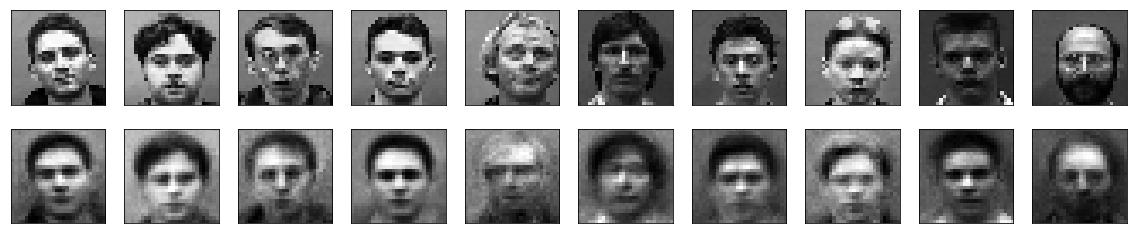

In [22]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    print(x_test[i])
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
